# Census Income Dataset from Kaggle
### Problem statement: Build a model that predicts whether a person has an income above 50k.
#### Algorithms: Logistic Regression & Random Forest
#### Author: Jainam Shah

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv("census.csv")
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


###### Understanding the dataset

In [3]:
df.shape

(32561, 15)

In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [9]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [11]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [13]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [14]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [15]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

### Feature Engineering

In [16]:
#Several columns contains "?" values, so replacing them with the MODE value of the respective columns.

df.workclass = df.workclass.replace('?',"Private")
df.occupation = df.occupation.replace("?","Prof-specialty")
df.race = df.race.replace("?","White")
df["native.country"] = df['native.country'].replace("?","United-States")

In [17]:
#Replacing relevent values into one value:

#education
df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'School')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')

#marital status
df['marital.status']= df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital.status']= df['marital.status'].replace(['Never-married'], 'unmarried')
df['marital.status']= df['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')
# income
df.income = df.income.replace('<=50K', 0)
df.income = df.income.replace('>50K', 1)
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,high school,9,other,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,high school,9,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,higher,10,other,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,School,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,higher,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,high school,9,other,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,School,6,other,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,unmarried,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,high school,9,other,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,higher,10,unmarried,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


### Exploratory Data Analysis & Data Visualisation

In [18]:
df['education'].value_counts()

high school    10501
higher         10316
Bachelors       5355
School          4253
Masters         1723
Doctorate        413
Name: education, dtype: int64

In [19]:
df['marital.status'].value_counts()

married      14999
unmarried    10683
other         6879
Name: marital.status, dtype: int64

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


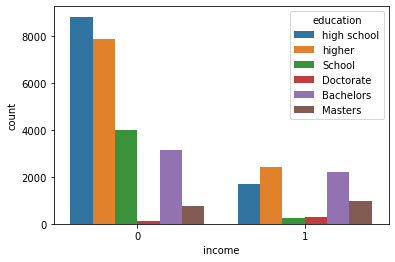

In [20]:
sns.countplot(df['income'], hue='education', data=df);

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


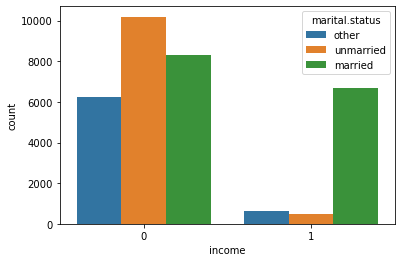

In [21]:
sns.countplot(df['income'], hue='marital.status', data=df);

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


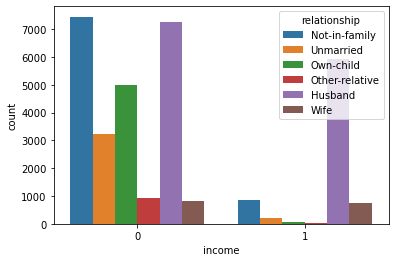

In [22]:
sns.countplot(df['income'], hue='relationship', data=df);

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


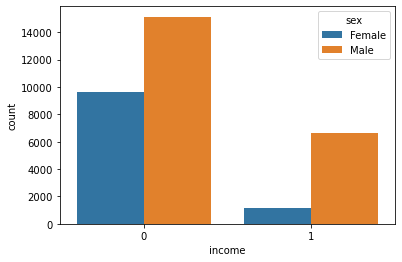

In [23]:
sns.countplot(df['income'], hue='sex', data=df);

In [24]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


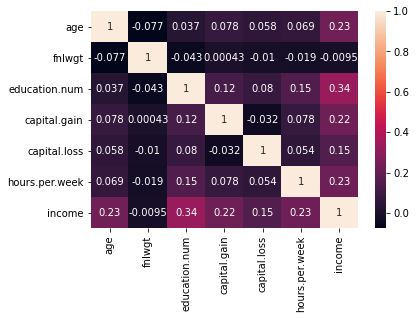

In [25]:
sns.heatmap(df.corr(), annot=True);

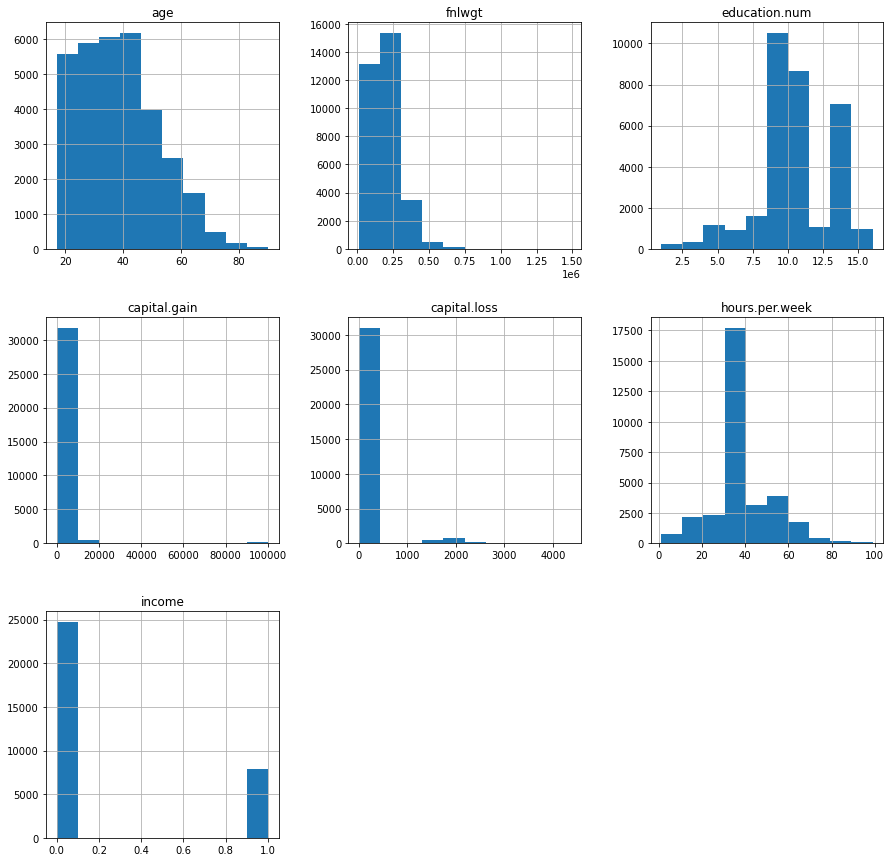

In [26]:
df.hist(figsize=(15,15));

C:\Users\Jainam Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


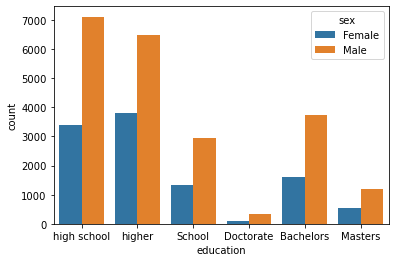

In [27]:
sns.countplot(df['education'], hue='sex', data=df);

### Machine Learning Modelling

In [28]:
#splitting data into two parts; one "income"(y) and other: rest of the dataset(X)
X = df.drop(['income'], axis=1) 
y = df['income']

In [30]:
#Data Normalisation/Feature scaling: Converting string to float to fit the data into the model.
from sklearn.preprocessing import StandardScaler, LabelEncoder

dfs= df.copy()
dfs= dfs.apply(LabelEncoder().fit_transform)
dfs.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,4,8,1,9,1,4,0,0,91,39,38,0
1,65,3,6514,4,8,1,3,1,4,0,0,91,17,38,0
2,49,3,11175,5,9,1,9,4,2,0,0,91,39,38,0
3,37,3,7009,3,3,1,6,4,4,0,0,90,39,38,0
4,24,3,16850,5,9,1,9,3,4,0,0,90,39,38,0
5,17,3,14182,4,8,1,7,4,4,0,0,89,44,38,0
6,21,3,7800,3,5,1,0,4,4,1,0,89,39,38,0
7,57,6,3183,1,15,2,9,2,4,0,0,88,19,38,1
8,51,0,20872,4,8,1,9,1,4,0,0,88,39,38,0
9,24,3,2360,5,9,2,2,4,4,1,0,87,59,38,1


In [31]:
std_scl = StandardScaler().fit(dfs.drop('income', axis=1))

In [32]:
X= std_scl.transform(dfs.drop('income', axis=1))
y= df['income']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.4f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.4f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.8411
Acc on test data: 0.8366


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.4f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.4f}".format(rfc.score(X_test, y_test)))

Acc on training data: 1.0000
Acc on test data: 0.8551


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))
#Here 0 represents <= 50k and 1 represents >50k

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4979
           1       0.73      0.61      0.67      1534

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

